In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
print(tf.__version__)

2.2.0


## make dataset for regression

In [2]:
N=1000
X = np.random.random((N,2))*6 - 3
Y = np.cos(2*X[:,0])+np.cos(3*X[:,1])

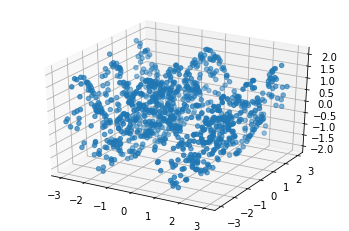

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X[:,0],X[:,1],Y)

## build model

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_shape=(2,), activation='relu'),
    tf.keras.layers.Dense(1)
])
opt = tf.keras.optimizers.Adam(0.01)
model.compile(optimizer=opt,loss='mse')
hist = model.fit(X,Y,epochs=100)


Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 0.9959
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.9388
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.9412
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.9089
Epoch 5/100
32/32 [==============================] - 0s 865us/step - loss: 0.8680
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8055
Epoch 7/100
32/32 [==============================] - 0s 902us/step - loss: 0.7391
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7190
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6381
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.5852
Epoch 11/100
32/32 [==============================] - 0s 1ms/step - loss: 0.5690
Epoch 12/100
32/32 [==============================] - 0s 1ms/step - loss: 0.5303
Epoch 13/100
32/32 [=============

## model investigation

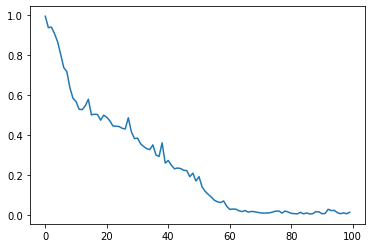

In [6]:
plt.plot(hist.history['loss'],label='loss')

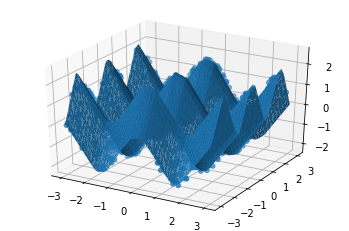

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X[:,0],X[:,1],Y)

line = np.linspace(-3,3,50)
xx, yy = np.meshgrid(line,line)
Xgrid = np.vstack((xx.flatten(),yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show()

## model is not general!

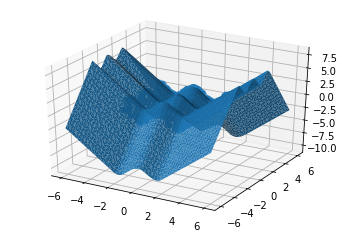

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X[:,0],X[:,1],Y)

line = np.linspace(-6,6,50)
xx, yy = np.meshgrid(line,line)
Xgrid = np.vstack((xx.flatten(),yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show()